# Gradient Descents

## Setup

In [2]:
import os
if os.getcwd().endswith("notebooks"):
    os.chdir('..')

print("Current working directory: ", os.getcwd())
if not os.getcwd().endswith("ML-Regression-Notebooks"):
    raise ValueError("Please change working directory to 'path/Classifying-the-MNIST' before proceeding")

Current working directory:  /Users/irellzane/MLprojects/ML-Regression-Notebooks


In [3]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
from sklearn.preprocessing import add_dummy_feature

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)
X_b = add_dummy_feature(X)

## Batch Gradient Descent

In [6]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    gradients = 2/ m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

In [7]:
theta

array([[4.21509616],
       [2.77011339]])

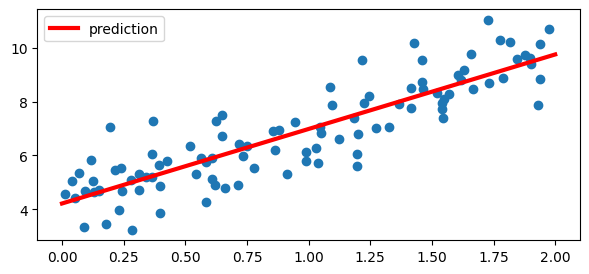

In [8]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_pred = X_new_b @ theta

plt.figure(figsize=(7, 3))
plt.scatter(X, y)
plt.plot(X_new, y_pred, "r-", linewidth="3", label="prediction")
plt.legend()
plt.show()

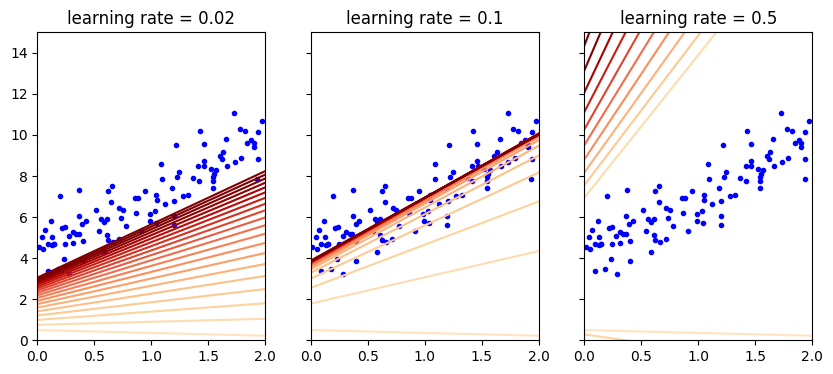

In [87]:
import matplotlib

def plt_gradient_descent(axs, theta, learning_rate):
    m = len(X_b)
    axs.plot(X, y, "b.")
    n_epochs = 1000
    n_shown = 20
    theta_path = []
    for epoch in range(n_epochs):
        if epoch < n_shown:
            y_predict = X_new_b @ theta
            color = matplotlib.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
            axs.plot(X_new, y_predict, linestyle="solid", color=color)
        gradients = 2/m * X_b.T @ (X_b @ theta - y)
        theta = theta - learning_rate * gradients
        theta_path.append(theta)
    axs.axis([0, 2, 0 , 15])
    axs.set_title(fr"learning rate = {learning_rate}")
    return theta_path


np.random.seed(42)
theta = np.random.randn(2, 1)  # random initialization

figure, (ax1, ax2, ax3) = plt.subplots(1, 3,figsize=(10, 4), sharey=True)
plt_gradient_descent(ax1, theta, 0.02)
plt_gradient_descent(ax2, theta, 0.1)
plt_gradient_descent(ax3, theta, 0.5)
plt.show()

## Stochastic Gradient Descents

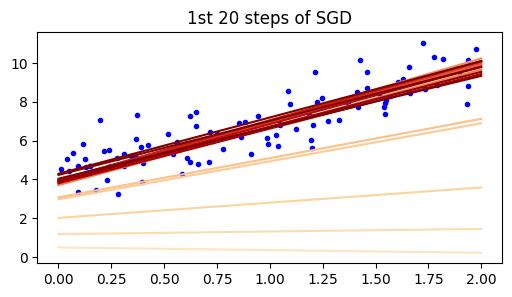

In [136]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)

n_shown = 20 
plt.figure(figsize=(6, 3))
plt.plot(X, y, "b.")
plt.title("1st 20 steps of SGD")
for epoch in range(n_epochs):
    for iteration in range(m):
        if epoch == 0 and iteration < n_shown:
            y_predict = X_new_b @ theta
            color = matplotlib.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
            plt.plot(X_new, y_predict, linestyle="solid", color=color)
        index = np.random.randint(0, m)
        xi = X_b[[index]]
        yi = y[[index]]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - (eta * gradients)
plt.show()

In [99]:
theta

array([[3.99837869],
       [2.53777324]])

## SGD with sklearn

In [ ]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, penalty=None, tol=1e-5, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)